In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
from keras import layers
from keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import RMSprop
import kwargs as kw


In [2]:
img=image.load_img("D:\\basedata\\Training\\Cat\\5.jpg")

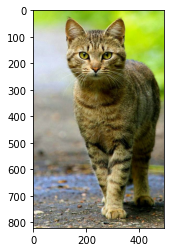

In [3]:
plt.imshow(img)

In [4]:
cv2.imread("D:\\basedata\\Training\\Cat\\5.jpg").shape

(821, 494, 3)

In [5]:
training=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [6]:
training_dataset=training.flow_from_directory('D:\\basedata\\Training\\' ,
                                              target_size=(200,200), 
                                              batch_size=3, 
                                              class_mode='binary')
validation_dataset=validation.flow_from_directory('D:\\basedata\\validation\\' ,
                                              target_size=(200,200), 
                                              batch_size=3, 
                                              class_mode='binary')

Found 116 images belonging to 2 classes.
Found 116 images belonging to 2 classes.


In [7]:
training_dataset.class_indices

{'Cat': 0, 'Dog': 1}

In [8]:
training_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [9]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  ##
                                  tf.keras.layers.Flatten(),
                                  ##
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  ##
                                  tf.keras.layers.Dense(1,activation='sigmoid')
]
)

In [18]:
model.compile(loss='binary_crossentropy',
                    optimizer = RMSprop(learning_rate=0.001),
                    metrics=['accuracy'] )

In [19]:
model_fit=model.fit(training_dataset,
                  steps_per_epoch = 5,
                   epochs=30,
                    validation_data=validation_dataset
                   )

Epoch 1/30
5/5 [==============================] - 8s 2s/step - loss: 4.5878 - accuracy: 0.8000 - val_loss: 0.7003 - val_accuracy: 0.5000
Epoch 2/30
5/5 [==============================] - 6s 1s/step - loss: 0.8387 - accuracy: 0.4667 - val_loss: 0.7445 - val_accuracy: 0.5000
Epoch 3/30
5/5 [==============================] - 6s 1s/step - loss: 0.8398 - accuracy: 0.4000 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 4/30
5/5 [==============================] - 6s 1s/step - loss: 0.6802 - accuracy: 0.6667 - val_loss: 0.7083 - val_accuracy: 0.5000
Epoch 5/30
5/5 [==============================] - 6s 1s/step - loss: 0.7436 - accuracy: 0.4667 - val_loss: 0.6886 - val_accuracy: 0.5603
Epoch 6/30
5/5 [==============================] - 6s 1s/step - loss: 0.6879 - accuracy: 0.6667 - val_loss: 0.6849 - val_accuracy: 0.5776
Epoch 7/30
5/5 [==============================] - 6s 1s/step - loss: 0.6437 - accuracy: 0.7333 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 8/30
5/5 [=========================

In [13]:
import os 
dir_path =('D:/basedata/Test/')

for i in os.listdir(dir_path):
    print(i)


1.jpg
2.jpg
3.jpg
cat.jpg
cato.jpg
dog.jpg


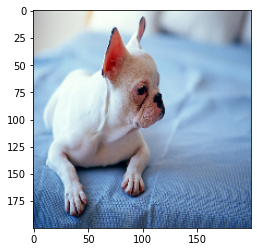

This is the Cat image


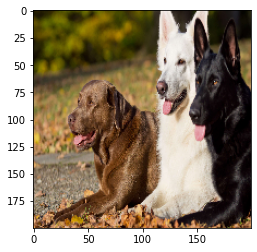

This is the Dog image


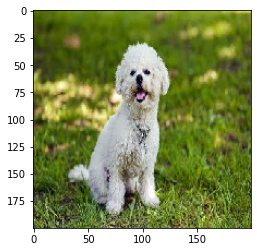

This is the Dog image


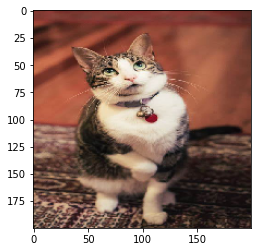

This is the Cat image


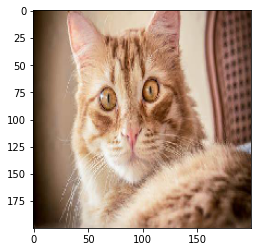

This is the Cat image


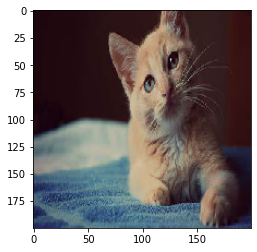

This is the Cat image


In [20]:

dir_path =('D:/basedata/Test/')

for i in os.listdir(dir_path):
    img=image.load_img(dir_path + '//' + i, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    val=model.predict(images)
    if val ==0:
        print("This is the Cat image")
    else:
            print("This is the Dog image")

In [21]:
model.save("Cat and Dog classification.h5")